In [1]:
#Install all the necessary packages
!pip install bs4
!pip install requests

In [2]:
# Import all the necessary libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

## Scrape website with Requests
- First, we use requests to scrape the website(using a GET request).
- requests.get() fetches all the content from a particular website and returns a response object(we call it html):

In [3]:
url = 'http://quotes.toscrape.com/'

html = requests.get(url)

In [4]:
html # Response 200 means that the request has succeeded

<Response [200]>

## Investigate HTML with Beautiful Soup
- We can use the response object to access certain features such as content, text, headers, etc.
- To obtain the text from the html object we use `html.text` which only returns the text of the response.
- Running html.text through BeautifulSoup using the `html.parser` gives us a Beautiful Soup object

In [5]:
soup = BeautifulSoup(html.text, 'html.parser')

`soup` represents the document as a nested data structure:

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Quotes to Scrape
  </title>
  <link href="/static/bootstrap.min.css" rel="stylesheet"/>
  <link href="/static/main.css" rel="stylesheet"/>
 </head>
 <body>
  <div class="container">
   <div class="row header-box">
    <div class="col-md-8">
     <h1>
      <a href="/" style="text-decoration: none">
       Quotes to Scrape
      </a>
     </h1>
    </div>
    <div class="col-md-4">
     <p>
      <a href="/login">
       Login
      </a>
     </p>
    </div>
   </div>
   <div class="row">
    <div class="col-md-8">
     <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
      <span class="text" itemprop="text">
       “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
      </span>
      <span>
       by
       <small class="author" itemprop="author">
        Albert Einstein
       </small>
       <a href="/author/Albert

## Navigate the Data
### Get all text
- Extract all the text from a page only

In [8]:
print(soup.get_text())





Quotes to Scrape








Quotes to Scrape




Login






“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
by Albert Einstein
(about)


            Tags:
            
change
deep-thoughts
thinking
world



“It is our choices, Harry, that show what we truly are, far more than our abilities.”
by J.K. Rowling
(about)


            Tags:
            
abilities
choices



“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
by Albert Einstein
(about)


            Tags:
            
inspirational
life
live
miracle
miracles



“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
by Jane Austen
(about)


            Tags:
            
aliteracy
books
classic
humor



“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
by Marilyn Monroe

### Investigate the title

In [9]:
# Print the complete HTML title
soup.title

<title>Quotes to Scrape</title>

In [10]:
# Show the name of the title tage
soup.title.name

'title'

In [11]:
# Print the text of the title
soup.title.string

'Quotes to Scrape'

In [12]:
# Show the name of the parent tag of title
soup.title.parent.name

'head'

In [13]:
# Investigate hyperlinks
soup.a

<a href="/" style="text-decoration: none">Quotes to Scrape</a>

## Extract specific elements with find and find_all
- Since there are many div tags in HTML, we can't use the previous approaches to extract relevant information.
- Instead, we need to use the `find` and `find_all` methods which you can use to extract specific HTML tags from the web page
- This methods can be used to retrieve all the elements on the page that match our specifications
- Let's say our goal is to obtain all quotes, authors and tags from the website `" Quotes to Scrape"`
- We want to store all information in a pandas dataframe(every row should contain a quote as well as the corresponding author and tags)
- First, we use SelectorGadget in Google Chrome to inspect the website

## Extract all quotes

In [14]:
# Use the div class "quote" to retrieve all relevant information regarfding the quotes

quotes = soup.find_all('div', {'class': 'quote'})


In [16]:
# Iterate through our quotes object and extract the text of all quotes
# The text of the quotes are available in the tage <span> as "class = text"

for i in quotes:
  print((i.find('span', {'class': 'text'})).text)

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”


## Extract all authors

In [17]:
for i in soup.findAll("div",{"class": "quote"}):
    print((i.find("small", {"class": "author"})).text)

Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin


## Extract all tags

In [18]:
for i in soup.findAll("div",{"class": "tags"}):
    print((i.find("meta"))['content'])

change,deep-thoughts,thinking,world
abilities,choices
inspirational,life,live,miracle,miracles
aliteracy,books,classic,humor
be-yourself,inspirational
adulthood,success,value
life,love
edison,failure,inspirational,paraphrased
misattributed-eleanor-roosevelt
humor,obvious,simile


## Create dataframe for all quotes, authors and tags

In [19]:
# store root url without page number
root = 'http://quotes.toscrape.com/page/'


# create empty arrays
quotes = []
authors = []
tags = []

# loop over page 1 to 10
for pages in range (1,10):
  html = requests.get(root + str(pages))

  soup = BeautifulSoup(html.text)

for i in soup.findAll("div",{"class":"quote"}):
                 quotes.append((i.find("span",{"class":"text"})).text)

for j in soup.findAll("div",{"class":"quote"}):
                 authors.append((j.find("small",{"class":"author"})).text)

for k in soup.findAll("div",{"class":"tags"}):
                 tags.append((k.find("meta"))['content'])

In [21]:
# Create pandas dataframe
df = pd.DataFrame(
    {'Quotes': quotes,
     'Authors': authors,
     'Tags': tags}
)

df.head()

,Quotes,Authors,Tags
0,“Anyone who has never made a mistake has never...,Albert Einstein,mistakes
1,“A lady's imagination is very rapid; it jumps ...,Jane Austen,"humor,love,romantic,women"
2,"“Remember, if the time should come when you ha...",J.K. Rowling,integrity
3,“I declare after all there is no enjoyment lik...,Jane Austen,"books,library,reading"
4,"“There are few people whom I really love, and ...",Jane Austen,"elizabeth-bennet,jane-austen"


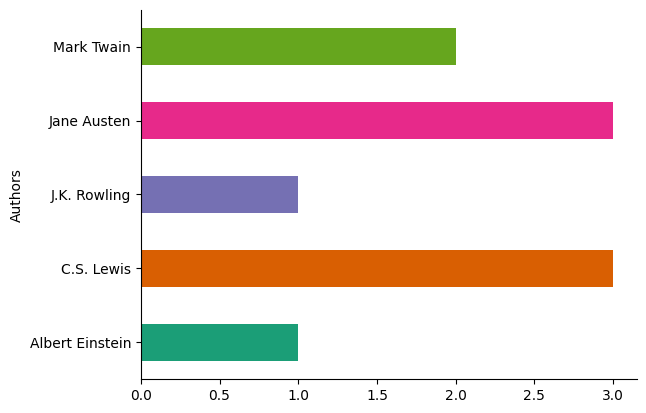

In [22]:
# @title Authors

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Authors').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)